## Telecom Churn

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')
pd.options.display.max_rows = 250
pd.options.display.max_columns = 100
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

### Step 1: Data Understanding and Inspection

In [2]:
# Reading dataset and inspecting various variables.
churn = pd.read_csv('telecom_churn_data.csv')
print(churn.shape)
churn.head()

(99999, 226)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,...,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,...,0.0,NaN,NaN,NaN,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,...,NaN,56.0,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
# Inspecting the variable datatypes
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
# Classifying categorical, numerical and date columns 
categ = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
numeric = []
date =  ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']
for i in list(churn):
    if i not in categ + date:
        numeric.append(i) 
print('Categorical:\n',categ)
print('Numerical:\n',numeric)
print('Date:\n',date)

Categorical:
 ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
Numerical:
 ['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_

In [5]:
# Extracting day out of date columns
for i in date:
    churn[i] = pd.to_datetime(churn[i], format = '%m/%d/%Y').dt.day

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(190), int64(36)
memory usage: 172.4 MB


### Step 2: Data Cleaning

In [7]:
#Checking for duplicates and null values
print(sum(churn.duplicated(subset = 'mobile_number')))

0


In [8]:
# Looking at the percentage of missing values
round(100*(churn.isnull().sum()/len(churn.index)),2).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [9]:
# Filling all the missing values in columns as 0. '0' suggests that the customers have not recharged or performed any activity on the network
churn[numeric] = churn[numeric].apply(lambda x: x.fillna(0))
churn[categ] = churn[categ].apply(lambda x: x.fillna(0))
round(100*(churn.isnull().sum()/len(churn.index)),2).sort_values(ascending=False)

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_9    74.08
date_of_last_rech_data_8    73.66
date_of_last_rech_9          4.76
date_of_last_rech_8          3.62
date_of_last_rech_7          1.77
last_date_of_month_9         1.66
date_of_last_rech_6          1.61
last_date_of_month_8         1.10
last_date_of_month_7         0.60
isd_og_mou_9                 0.00
isd_og_mou_8                 0.00
sep_vbc_3g                   0.00
spl_og_mou_6                 0.00
spl_og_mou_7                 0.00
isd_og_mou_6                 0.00
spl_og_mou_8                 0.00
spl_og_mou_9                 0.00
og_others_6                  0.00
isd_og_mou_7                 0.00
std_og_mou_8                 0.00
std_og_mou_9                 0.00
og_others_8                  0.00
std_og_mou_7                 0.00
std_og_mou_6                 0.00
std_og_t2c_mou_9             0.00
std_og_t2c_mou_8             0.00
std_og_t2c_mou_7             0.00
std_og_t2c_mou

In [10]:
# Let's look at the categorical columns
for i in categ:
    print(churn[i].value_counts()/churn[i].value_counts().sum() * 100)
    print('\n')

0.0    99.368994
1.0     0.631006
Name: night_pck_user_6, dtype: float64


0.0    99.410994
1.0     0.589006
Name: night_pck_user_7, dtype: float64


0.0    99.450995
1.0     0.549005
Name: night_pck_user_8, dtype: float64


0.0    99.585996
1.0     0.414004
Name: night_pck_user_9, dtype: float64


0.0    76.99977
1.0    23.00023
Name: fb_user_6, dtype: float64


0.0    76.761768
1.0    23.238232
Name: fb_user_7, dtype: float64


0.0    76.536765
1.0    23.463235
Name: fb_user_8, dtype: float64


0.0    77.681777
1.0    22.318223
Name: fb_user_9, dtype: float64




In [11]:
# Let's look at date columns
for i in date:
    print(churn[i].value_counts()/churn[i].value_counts().sum() * 100)
    print('\n')

30    100.0
Name: last_date_of_month_6, dtype: float64


31.0    100.0
Name: last_date_of_month_7, dtype: float64


31.0    100.0
Name: last_date_of_month_8, dtype: float64


30.0    100.0
Name: last_date_of_month_9, dtype: float64


30.0    17.237174
29.0    13.129116
27.0    11.351533
28.0     9.646109
26.0     5.620376
25.0     4.976014
17.0     4.212741
24.0     4.196479
14.0     3.907838
21.0     3.808236
23.0     2.955525
18.0     2.791894
12.0     2.552037
22.0     2.382308
13.0     2.182088
19.0     2.041833
20.0     1.832466
16.0     1.144402
15.0     0.887267
11.0     0.588462
8.0      0.528498
5.0      0.332344
7.0      0.327262
10.0     0.287625
3.0      0.236808
1.0      0.221563
9.0      0.202252
6.0      0.175827
4.0      0.133141
2.0      0.110781
Name: date_of_last_rech_6, dtype: float64


31.0    17.599153
30.0    14.112509
25.0     9.570201
29.0     9.214920
28.0     7.637023
27.0     6.015351
26.0     5.478866
24.0     4.069957
19.0     3.112021
22.0     3.022437
20

In [12]:
# Let's drop the highly skewed variables and last date of month columns.
churn.drop(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'mobile_number'], axis = 1, inplace = True)
print(churn.shape)

(99999, 217)


The missing values in date columns suggest that a lot of customers haven't recharged.

In [13]:
# Imputing date columns having missing values with 0
temp = ['date_of_last_rech_9','date_of_last_rech_8', 'date_of_last_rech_7','date_of_last_rech_6','date_of_last_rech_9','date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_9', 'date_of_last_rech_data_8']
churn[temp] = churn[temp].apply(lambda x: x.fillna(0))
churn[temp] = churn[temp].applymap(np.int64)

In [14]:
round(100*(churn.isnull().sum()/len(churn.index)),2).sort_values(ascending=False)

sep_vbc_3g                  0.0
isd_og_mou_9                0.0
total_og_mou_8              0.0
total_og_mou_7              0.0
total_og_mou_6              0.0
og_others_9                 0.0
og_others_8                 0.0
og_others_7                 0.0
og_others_6                 0.0
spl_og_mou_9                0.0
spl_og_mou_8                0.0
spl_og_mou_7                0.0
spl_og_mou_6                0.0
isd_og_mou_8                0.0
std_ic_t2f_mou_9            0.0
isd_og_mou_7                0.0
isd_og_mou_6                0.0
std_og_mou_9                0.0
std_og_mou_8                0.0
std_og_mou_7                0.0
std_og_mou_6                0.0
std_og_t2c_mou_9            0.0
std_og_t2c_mou_8            0.0
std_og_t2c_mou_7            0.0
std_og_t2c_mou_6            0.0
std_og_t2f_mou_9            0.0
total_og_mou_9              0.0
loc_ic_t2t_mou_6            0.0
loc_ic_t2t_mou_7            0.0
loc_ic_t2t_mou_8            0.0
std_ic_t2f_mou_7            0.0
std_ic_t

In [15]:
# Dropping unique value columns, if any
for i in churn.columns:
    if len(churn[i].unique()) == 1:
        churn.drop(i, inplace=True, axis=1)

In [16]:
churn.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,...,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.4,0.0,101.20,3.58
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,154.0,50.0,0.0,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,28.61,7.60,0.0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0.0,1006,0.0,0.0,0.00,0.00
2,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,0.00,0.00,0.00,2.84,0.00,0.00,0.00,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1103,0.0,0.0,4.17,0.00
3,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,14.89,289.58,226.21,2.99,1.73,6.53,9.99,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,2491,0.0,0.0,0.00,0.00
4,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.0,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,0.00,0.00,0.00,9.31,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1526,0.0,0.0,0.00,0.00


**Derived variable**

From the problem statement, we know that those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months. So, let's club the two month columns and derive a new variable.

In [17]:
# Total recharge amount includes both, call and data recharge. So, let's add both the columns for the two months
churn['total_amt+data_6'] = churn['total_rech_amt_6'] + churn['av_rech_amt_data_6'] * churn['total_rech_data_6']
churn['total_amt+data_7'] = churn['total_rech_amt_7'] + churn['av_rech_amt_data_7'] * churn['total_rech_data_7']
churn['avg_amt+data_6_7'] = (churn['total_amt+data_6'] + churn['total_amt+data_7']) * 0.5

In [18]:
churn[['total_amt+data_6', 'total_amt+data_7', 'avg_amt+data_6_7']].head()

,total_amt+data_6,total_amt+data_7,avg_amt+data_6_7
0,614.0,504.0,559.0
1,74.0,538.0,306.0
2,168.0,315.0,241.5
3,230.0,310.0,270.0
4,252.0,350.0,301.0


**Filter High value customers**

With the help of the derived variable 'avg_amt+data_6_7', let's filter the high value customers as we need to predict churn only for them.

In [19]:
churn_hvc = churn[churn['avg_amt+data_6_7'] >= churn['avg_amt+data_6_7'].quantile(0.7)]
print(churn_hvc.shape)

(30001, 208)


**Tag Churners**

Let's tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls AND have not used internet even once in the churn phase.

In [20]:
# Tagging churners depends upon the following attributes of month 'September'
churn_hvc['total_call+data_9'] = churn_hvc['total_ic_mou_9'] + churn_hvc['total_og_mou_9'] + churn_hvc['vol_2g_mb_9'] + churn_hvc['vol_3g_mb_9']

In [21]:
# Let's make a 'churn' column. If Customers with 'total_call+data_9' = 0, then churn = 1, else 0
churn_hvc['churn'] = churn_hvc['total_ic_mou_9'].apply(lambda x:1 if x==0 else 0)
churn_hvc[['total_ic_mou_9', 'churn']].head(10)

,total_ic_mou_9,churn
0,0.00,1
7,0.00,1
8,34.91,0
21,252.61,0
23,127.48,0
33,114.16,0
38,114.09,0
41,165.84,0
48,894.81,0
53,680.61,0


In [22]:
# Let's look at the churn ratio
(churn_hvc['churn'].value_counts()/churn_hvc.shape[0])*100

0    90.020333
1     9.979667
Name: churn, dtype: float64

As we can see that the dataset is highly imbalanced, we shall take care of it before we split the data into train and test sets.

Now that we have filtered the high value customers and derived the churn ratio, we can drop the redundant variables from months 6 and 7. Also let's drop month 9 columns.

In [23]:
# Dropping redundant columns from 6 and 7
churn_hvc = churn_hvc.drop(['total_rech_amt_6', 'total_rech_amt_7', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'total_rech_data_6','total_rech_data_7'], axis=1)

In [24]:
# Dropping all the columns from month 9
col9 = [x for x in list(churn_hvc) if '_9' in x]
churn_hvc = churn_hvc.drop(col9, axis = 1)

In [25]:
churn_hvc.shape

(30001, 153)

### Step 3: Data Visualization and EDA

In [26]:
churn_hvc.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,...,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt+data_6,total_amt+data_7,avg_amt+data_6_7,churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,...,21,16,8,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,...,0,31,23,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.00,0.00,19.83,0.00,0.00,0.00,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,0.00,437.0,955.0,696.0,0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,720,0.00,0.00,0.00,0.00,600.0,680.0,640.0,0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,...,0,7,6,2.0,0.0,179.0,179.0,0.0,0.0,0.0,0.0,2.0,2.0,270.0,0.00,0.48,0.01,0.00,599.09,1009.92,0.00,306.57,197.27,0.00,301.78,150.67,0,0,0,0,0,0,0,2,1,0,0,1,0.0,1.0,1.0,604,40.45,51.86,0.00,0.00,0.0,1166.0,583.0,0


<AxesSubplot:xlabel='churn', ylabel='count'>

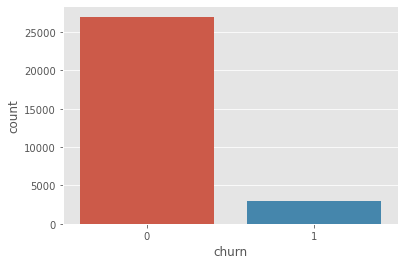

In [27]:
# Let's look at the churn ratio plot
plt.figure(figsize=(6,4))
sns.countplot(x = 'churn', data = churn_hvc)

In [28]:
round(100*(churn_hvc.isnull().sum()/len(churn_hvc.index)),2).sort_values(ascending=False)

churn                       0.0
spl_og_mou_8                0.0
loc_ic_t2t_mou_6            0.0
total_og_mou_8              0.0
total_og_mou_7              0.0
total_og_mou_6              0.0
og_others_8                 0.0
og_others_7                 0.0
og_others_6                 0.0
spl_og_mou_7                0.0
std_ic_mou_6                0.0
spl_og_mou_6                0.0
isd_og_mou_8                0.0
isd_og_mou_7                0.0
isd_og_mou_6                0.0
std_og_mou_8                0.0
std_og_mou_7                0.0
std_og_mou_6                0.0
loc_ic_t2t_mou_7            0.0
loc_ic_t2t_mou_8            0.0
loc_ic_t2m_mou_6            0.0
loc_ic_t2m_mou_7            0.0
std_ic_t2f_mou_7            0.0
std_ic_t2f_mou_6            0.0
std_ic_t2m_mou_8            0.0
std_ic_t2m_mou_7            0.0
std_ic_t2m_mou_6            0.0
std_ic_t2t_mou_8            0.0
std_ic_t2t_mou_7            0.0
std_ic_t2t_mou_6            0.0
loc_ic_mou_8                0.0
loc_ic_m

<AxesSubplot:xlabel='churn', ylabel='total_amt+data_7'>

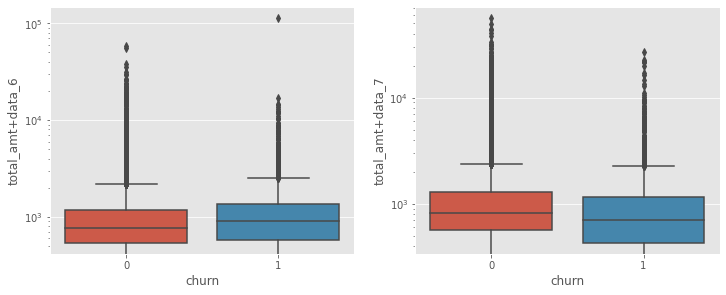

In [29]:
# Plot for total amount and data combined for months 6 and 7
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.yscale('log')
sns.boxplot(y = 'total_amt+data_6', data = churn_hvc, x = 'churn')
plt.subplot(2,2,2)
plt.yscale('log')
sns.boxplot(y = 'total_amt+data_7', data = churn_hvc, x = 'churn')

<AxesSubplot:xlabel='churn', ylabel='arpu_8'>

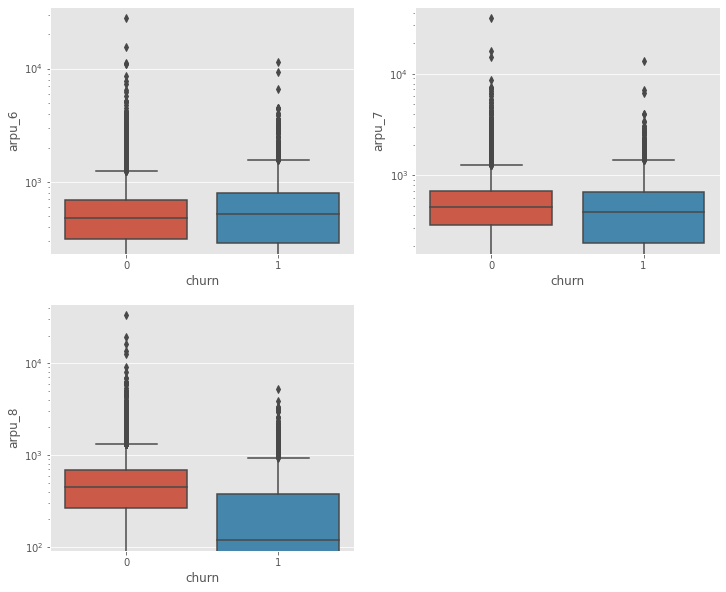

In [30]:
# Let's look at the avg revenue per user
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.yscale('log')
sns.boxplot(y = 'arpu_6', data = churn_hvc, x = 'churn')
plt.subplot(2,2,2)
plt.yscale('log')
sns.boxplot(y = 'arpu_7', data = churn_hvc, x = 'churn')
plt.subplot(2,2,3)
plt.yscale('log')
sns.boxplot(y = 'arpu_8', data = churn_hvc, x = 'churn')

Here we can see that the revenue for the churners started to drop as the months passed.

<AxesSubplot:xlabel='churn', ylabel='total_rech_num_8'>

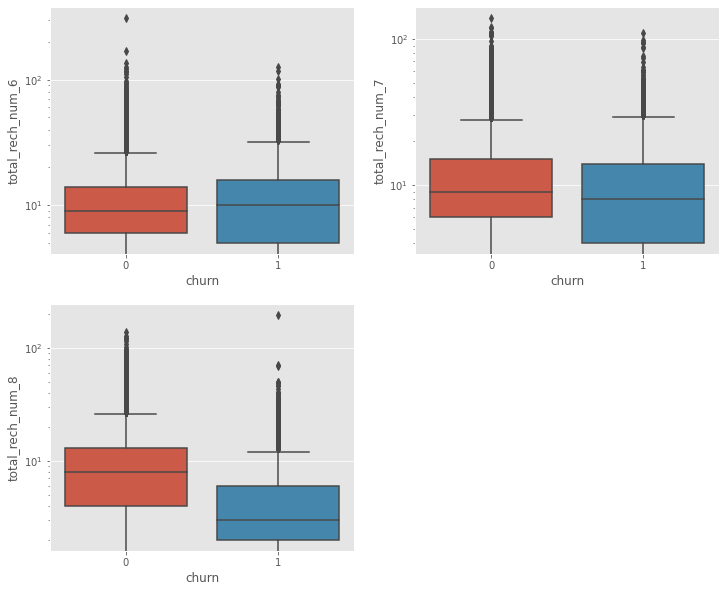

In [31]:
# Let's look at the total recharge number for the months 6,7 and 8
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.yscale('log')
sns.boxplot(y = 'total_rech_num_6', data = churn_hvc, x = 'churn')
plt.subplot(2,2,2)
plt.yscale('log')
sns.boxplot(y = 'total_rech_num_7', data = churn_hvc, x = 'churn')
plt.subplot(2,2,3)
plt.yscale('log')
sns.boxplot(y = 'total_rech_num_8', data = churn_hvc, x = 'churn')

Similarly, the total recharges dropped as we reached month 8.

<AxesSubplot:xlabel='date_of_last_rech_8', ylabel='count'>

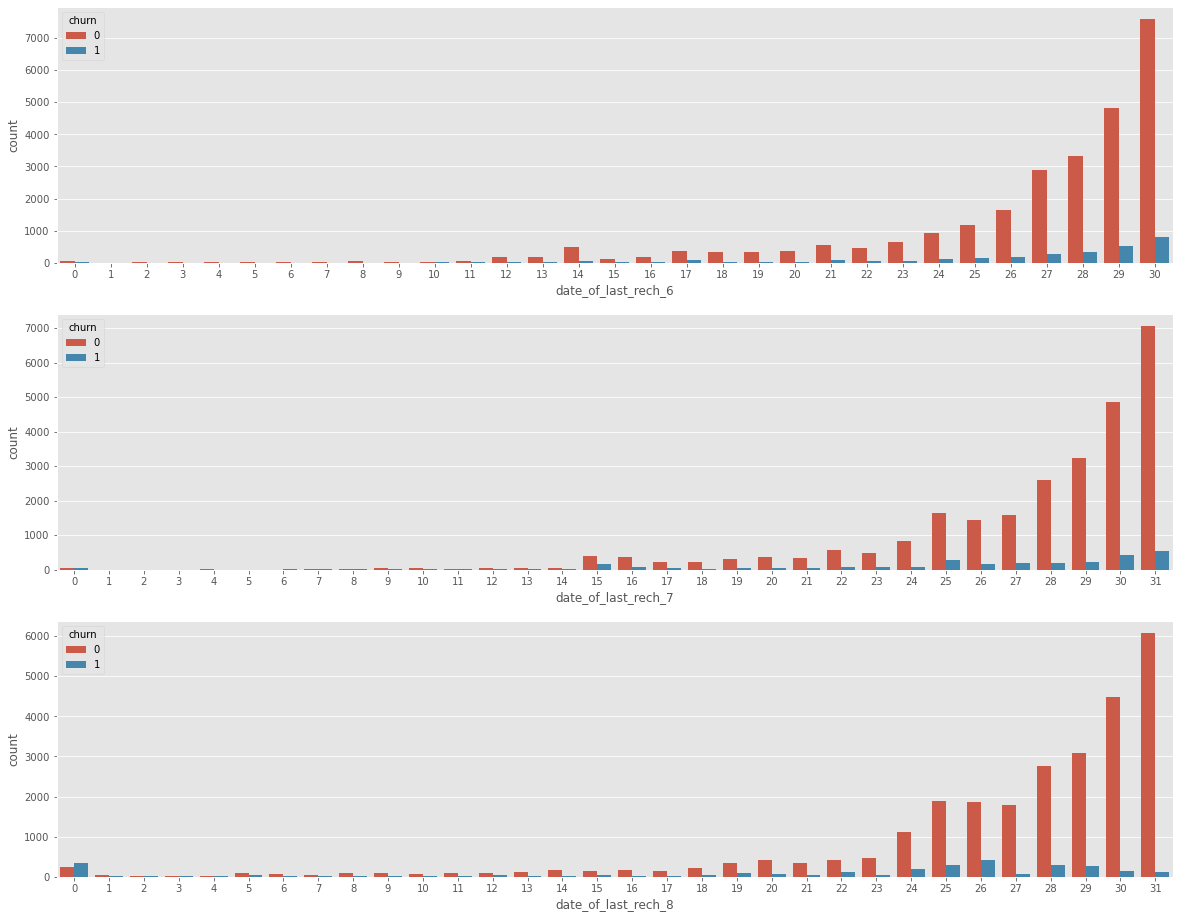

In [32]:
# Let's look at the churn ratio for all days of the months 6,7,8
plt.figure(figsize=(20,16))
plt.subplot(3,1,1)
sns.countplot(x = 'date_of_last_rech_6', data = churn_hvc, hue = 'churn')
plt.subplot(3,1,2)
sns.countplot(x = 'date_of_last_rech_7', data = churn_hvc, hue = 'churn')
plt.subplot(3,1,3)
sns.countplot(x = 'date_of_last_rech_8', data = churn_hvc, hue = 'churn')

Here we can see that most churners are likely to churn at the end of the month

In [33]:
churn_hvc.describe(percentiles=[0.01, 0.1, .25, .5, .75, .90, .95, .99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,...,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt+data_6,total_amt+data_7,avg_amt+data_6_7,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,558.490824,560.782203,508.597957,260.793024,267.819295,234.112539,373.693961,378.103169,335.077044,16.110355,12.642504,12.500551,26.571547,20.152086,19.865615,84.484753,85.674287,78.077112,163.243297,163.009963,151.756812,6.344115,6.423683,5.886385,1.575104,1.889875,1.707746,254.080388,255.116292,235.728174,165.885296,174.233972,148.441175,179.433389,187.920768,157.350068,1.803548,1.826051,1.584734,347.125955,363.984508,307.379315,2.171525,2.105743,1.948970,5.818270,7.108646,6.557204,0.661092,0.042905,...,11.266158,11.974034,10.805006,1.621913,78.079564,79.841805,72.492917,1.240559,1.397287,1.208493,0.427152,0.456518,0.413420,122.132258,126.522185,125.097326,105.913072,344.258568,370.196701,351.493998,67.007633,68.621327,62.773480,63.439374,64.701428,58.395301,0.174494,0.183261,0.153628,1.066064,1.214026,1.054865,0.217759,0.229026,0.211026,0.209393,0.227492,0.202393,0.517483,0.524049,0.477084,1209.368754,169.138860,178.872765,158.523962,8.029788,1116.509509,1188.731748,1152.620628,0.099797
std,460.640461,479.776947,501.961981,459.644368,479.993989,458.448598,482.523558,498.923555,482.062509,76.302156,75.785903,74.125281,116.205525,96.100428,104.719009,228.794004,240.525999,227.373609,250.116700,241.576705,233.660905,22.123561,21.944183,19.502281,6.303385,9.158984,7.2081

**Outlier Treatment**

In [34]:
# Outlier treatment 
temp1 = [x for x in list(churn_hvc) if x not in ['mobile_number', 'churn']]
for i in temp1:
    Q = churn_hvc[i].quantile([0.01,0.99]).values
    churn_hvc[i][churn_hvc[i] <= Q[0]] = Q[0]
    churn_hvc[i][churn_hvc[i] >= Q[1]] = Q[1]

In [35]:
churn_hvc.describe(percentiles=[0.01, 0.1, .25, .5, .75, .90, .95, .99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,...,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt+data_6,total_amt+data_7,avg_amt+data_6_7,churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,548.809784,551.084737,498.243103,252.166035,258.623657,224.895572,365.893079,369.516995,325.038955,13.572928,9.636307,9.763929,22.732495,16.688892,15.985223,76.276691,76.684236,69.731313,157.665587,158.203257,147.305392,5.643210,5.731630,5.285765,1.362552,1.575163,1.481738,246.626435,247.287914,228.611178,158.048676,166.047149,140.286313,171.264157,179.395078,147.561895,1.274549,1.240659,1.098446,337.942800,354.112553,296.480381,0.693781,0.691429,0.488093,5.261622,6.396756,5.806187,0.581238,0.0,...,11.266158,11.974034,10.805006,1.559248,75.945568,77.590880,70.657511,1.209760,1.356655,1.172361,0.392720,0.412186,0.370154,118.676290,119.124600,117.212448,98.017343,319.678307,346.453318,327.562323,63.032717,63.975454,59.098443,59.521930,60.782637,55.077263,0.173094,0.181627,0.151895,1.035465,1.173661,1.019133,0.208760,0.216326,0.201260,0.172461,0.192027,0.155628,0.517483,0.524049,0.477084,1208.736642,160.497302,169.690165,149.463829,5.913960,1066.954470,1134.028256,1106.882099,0.099797
std,358.130151,360.433210,383.295094,403.510223,418.167038,390.856953,434.200835,443.919067,409.754119,49.336952,38.699269,38.946961,79.312550,62.862903,60.492319,149.890333,150.825195,136.796483,212.563010,209.596997,204.027495,13.745878,13.824771,12.978820,3.999325,4.502008,4.394694,326.690254,3

In [36]:
# Putting feature variables to x

X = churn_hvc.drop(['churn'], axis=1)
X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,...,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt+data_6,total_amt+data_7,avg_amt+data_6_7
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,...,252,21,16,8,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,614.0,504.0,559.0
7,1069.180,1349.850,1986.622,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,...,565,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,...,10,0,31,23,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.00,0.00,19.83,0.00,0.00,0.00,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,0.00,437.0,955.0,696.0
21,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,...,50,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,720,0.00,0.00,0.00,0.00,600.0,680.0,640.0
23,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.0,0.0,17.71,131.91,133.68,182.14,0.00,0.00,0.00,2.36,6.35,39.61,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,...,0,0,7,6,2.0,0.0,179.0,179.0,0.0,0.0,0.0,0.0,2.0,2.0,270.0,0.00,0.48,0.01,0.00,599.09,1009.92,0.00,306.57,197.27,0.00,301.78,150.67,0,0,0,0,0,0,0,2,1,0,0,1,0.0,1.0,1.0,604,40.45,51.86,0.00,0.00,0.0,1166.0,583.0


In [37]:
# Putting response variable to y
y = churn_hvc['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

Let's take care of the data imbalance before we start with the model building.

In [38]:
# Using SMOTE function to get rid of the data imbalance
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state = 10) 
X, y = smote.fit_sample(X, y) 
print(X.shape,'\n')
print(y.shape,'\n')

(54014, 152) 

(54014,) 



### Step 4: Test-Train Split

In [39]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
print(X_train.shape,'\n')
print(X_test.shape,'\n')
print(y_train.shape,'\n')
print(y_test.shape)

(37809, 152) 

(16205, 152) 

(37809,) 

(16205,)


 ### Step 5: Feature Scaling

In [41]:
scaler = StandardScaler()
X_train.loc[:,:] = scaler.fit_transform(X_train.loc[:,:])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,...,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt+data_6,total_amt+data_7,avg_amt+data_6_7
53909,-0.154797,1.153188,1.249825,0.008519,0.253024,0.483827,0.219896,1.812281,1.192849,1.571463,0.116002,0.518436,0.924419,0.056519,0.522783,0.941371,1.996256,2.018102,0.487207,0.801229,0.898417,2.015668,0.978599,0.727304,1.437706,-0.335742,-0.310887,0.789255,1.442013,1.464687,-0.417096,-0.389019,-0.288614,-0.087728,1.758205,0.979922,1.154998,-0.145835,1.140905,-0.327696,0.880964,0.419243,-0.177304,-0.169632,-0.142198,0.118537,-0.489151,-0.421885,-0.414919,0.0,...,0.335122,-0.958732,-0.916808,0.277818,-0.095782,-0.729228,-0.704968,-0.147751,-0.516855,-0.517233,0.057293,-0.495465,-0.473944,-0.395573,-0.308503,-0.433562,-0.411362,-0.338960,-0.473698,-0.458961,-0.403832,-0.460334,-0.444257,-0.380455,-0.490479,-0.461229,-0.391511,-0.310098,-0.312156,-0.284931,-0.432802,-0.436399,-0.359447,-0.380181,-0.374787,-0.330375,-0.269609,-0.252271,-0.20978,-1.031025,-0.992824,-0.786140,1.741952,-0.380983,-0.414982,-0.418446,-0.171853,-0.490650,0.197785,-0.161151
3900,-0.272916,0.523051,1.496777,-0.610685,0.923715,2.096046,-0.766365,0.753220,1.062181,0.030440,-0.308611,-0.309234,-0.126001,-0.334898,-0.330474,-0.466451,-0.412896,-0.336304,-0.666883,-0.588446,-0.353398,-0.365536,0.237451,0.225155,1.211539,2.611146,1.322196,-0.673554,-0.578373,-0.381485,-0.483732,1.232098,2.641022,-0.511863,1.200468,1.649242,-0.227291,-0.215498,-0.184829,-0.650359,1.514596,2.605435,-0.177304,-0.167200,-0.142198,-0.501982,0.533432,0.469513,-0.414919,0.0,...,1.801511,1.431987,1.245353,1.297529,-0.066314,0.735377,0.764051,0.987310,-0.075439,-0.085730,0.090499,-0.495465,-0.473944,-0.395573,0.359786,1.564209,-0.151830,-0.212663,-0.437756,0.091933,1.339134,-0.458593,-0.442688,-0.372336,0.319484,-0.461229,-0.391511,2.603542,2.546931,2.917495,-0.432802,-0.436399,-0.359447,-0.380181,-0.374787,-0.330375,-0.269609,-0.252271,-0.20978,1.020065,1.058989,1.335541,-0.245783,1.314915,0.356383,-0.036926,-0.171853,-0.531391,0.296763,-0.123593
41079,0.780919,-1.276672,-0.963073,2.665556,-0.570972,-0.482208,0.035646,-0.674178,-0.629579,0.001841,1.159391,0.595709,-0.291805,0.258029,-0.288298,-0.253742,-0.449208,-0.399578,-0.458501,-0.647066,-0.548235,-0.345539,-0.358312,-0.321675,-0.362170,-0.363876,-0.310887,-0.443485,-0.656869,-0.558464,3.105221,-0.460559,-0.362095,0.330056,-0.483460,-0.390754,-0.227291,-0.215498,-0.184829,2.139317,-0.613503,-0.473010,-0.177304,-0.169632,-0.142198,0.913683,-0.509407,-0.421885,0.795834,0.0,...,-0.658873,-0.958732,-0.916808,-0.741892,-0.528991,-0.729228,-0.704968,-0.588456,-0.516855,-0.517233,-0.430860,-0.495465,-0.473944,-0.395573,-0.567976,-0.433562,-0.411362,-0.338

In [42]:
X_test.loc[:,:] = scaler.transform(X_test.loc[:,:])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,...,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt+data_6,total_amt+data_7,avg_amt+data_6_7
26250,3.803539,4.002733,4.239066,0.070825,0.136353,0.543243,2.553705,2.095500,1.912682,-0.298902,2.383558,-0.309234,-0.314584,2.331084,-0.330474,1.676744,1.495129,2.420771,4.580498,3.649562,3.613363,7.269595,7.339006,7.513041,-0.36217,-0.363876,-0.310887,4.556996,3.606603,3.710687,-0.433661,-0.388929,-0.249246,-0.502997,-0.343351,-0.218805,8.277303,8.989796,9.527847,-0.138044,-0.270914,-0.100094,-0.177304,-0.169632,1.042512,-0.501982,-0.509407,-0.421885,-0.414919,0.0,...,-0.658873,-0.073281,-0.916808,-0.741892,-0.528991,1.667398,-0.704968,-0.588456,-0.516855,-0.517233,-0.43086,0.636700,-0.473944,-0.395573,-0.567976,-0.407393,-0.411362,-0.338960,-0.111926,-0.458961,-0.403832,0.907861,-0.444257,-0.380455,1.036397,-0.461229,-0.391511,-0.310098,-0.312156,-0.284931,-0.432802,-0.436399,-0.359447,1.512664,-0.374787,-0.330375,-0.269609,-0.252271,-0.20978,1.020065,-0.992824,-0.786140,1.805699,0.399172,-0.024435,0.147373,3.937080,0.963015,2.722021,2.191702
39530,-0.927742,-0.834457,-0.432374,-0.620550,-0.589004,-0.486994,-0.790683,-0.752168,-0.587181,-0.298902,-0.308611,-0.309234,-0.314584,-0.334898,-0.330474,-0.466451,-0.449208,-0.399578,-0.666883,-0.647066,-0.548235,-0.365536,-0.358312,-0.321675,-0.36217,-0.363876,2.284770,-0.673554,-0.656869,-0.558464,-0.483732,-0.460559,-0.362095,-0.511863,-0.483460,-0.390754,-0.227291,-0.215498,-0.184829,-0.650359,-0.613503,-0.473010,-0.177304,-0.169632,-0.142198,-0.501982,-0.509407,1.286396,-0.414919,0.0,...,-0.658873,0.280900,0.121029,-0.278387,-0.066314,1.667398,1.698881,1.990071,-0.516855,-0.517233,-0.43086,0.636700,0.645851,0.903296,0.950180,-0.433562,-0.411362,-0.338960,0.065550,0.011999,0.275076,0.907861,0.942551,1.200034,1.036397,1.039398,1.327596,-0.310098,-0.312156,-0.284931,-0.432802,-0.436399,-0.359447,1.512664,1.539088,1.790724,-0.269609,-0.252271,-0.20978,1.020065,1.058989,1.335541,-0.899475,-0.380983,-0.414982,-0.418446,-0.171853,-0.601016,-0.515360,-0.657805
11129,-0.889151,-0.577237,-0.155620,-0.578249,-0.568827,-0.421762,-0.581123,-0.492969,-0.306366,-0.298902,-0.308611,-0.309234,-0.311350,-0.334898,-0.330474,-0.326217,-0.396975,-0.261021,-0.623246,-0.504519,-0.443465,7.021306,7.339006,6.319352,-0.36217,-0.363876,-0.310887,-0.299182,-0.222591,-0.164291,-0.483732,-0.455657,-0.339449,-0.498350,-0.477081,-0.272287,-0.227291,-0.215498,-0.184829,-0.641738,-0.606368,-0.386812,-0.177304,-0.169632,-0.142198,-0.501982,-0.509407,-0.421885,-0.414919,0.0,...,0.463062,0.280900,0.985894,0.092417,-0.066314,0.136220,0.163089,0.895220,-0.516855,-0.517233,-0.43086,0.636700,1.765646,0.903296,0.305566,-0.333338,-0.17132

### Step 6: Model Building

**1. Model for good interpretability**

**Logistic Regression**

In [43]:
# Logistic regression model
lm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37809
Model:                            GLM   Df Residuals:                    37658
Model Family:                Binomial   Df Model:                          150
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8768.7
Date:                Thu, 28 Jan 2021   Deviance:                       17537.
Time:                        12:42:09   Pearson chi2:                 1.72e+11
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.7981      0.057     13.982      0.000       0.686       0.910
arpu_6                       0.1447      0.058      2.493      0.013       0.031       0.258
arpu_7                       0.1023      0.060      1.714      0.086      -0.015       0.219
arpu_8                       0.0311      0.080      0.391      0.696      -0.125       0.187
onnet_mou_6                 -0.0547      0.197     -0.278      0.781      -0.440       0.331
onnet_mou_7                  0.5427      0.193      2.808      0.005       0.164       0.922
onnet_mou_8                 -0.4456      0.168     -2.658      0.008      -0.774      -0.117
offnet_mou_6                -0.1643      0.176     -0.933      0.351      -0.509       0.181
offnet_mou_7                 0.7874      0.212      3.716      0.000       0.372       1.203
offnet_mou_8                -0.3057      0.162     -1.882      0.060      -0.624       0.013
roam_ic_mou_6                0.0569      0.038      1.511      0.131      -0.017       0.131
roam_ic_mou_7                0.0859      0.042      2.033      0.042       0.003       0.169
roam_ic_mou_8               -0.0356      0.037     -0.972      0.331      -0.107       0.036
roam_og_mou_6                0.0306      0.051      0.596      0.551      -0.070       0.131
roam_og_mou_7               -0.0453      0.051     -0.884      0.377      -0.146       0.055
roam_og_mou_8                0.2459      0.044      5.529      0.000       0.159       0.333
loc_og_t2t_mou_6            -0.0370      0.105     -0.352      0.725      -0.243       0.169
loc_og_t2t_mou_7            -0.3268      0.124     -2.640      0.008      -0.569      -0.084
loc_og_t2t_mou_8            -0.2889      0.132     -2.182      0.029      -0.548      -0.029
loc_og_t2m_mou_6            -0.1238      0.136     -0.910      0.363      -0.390       0.143
loc_og_t2m_mou_7            -0.5448      0.161     -3.385      0.001      -0.860      -0.229
loc_og_t2m_mou_8            -0.4336      0.189     -2.289      0.022      -0.805      -0.062
loc_og_t2f_mou_6            -0.0750      0.037     -2.006      0.045      -0.148      -0.002
loc_og_t2f_mou_7            -0.1346      0.043     -3.159      0.002      -0.218      -0.051
loc_og_t2f_mou_8             0.0545      0.040      1.372      0.170      -0.023       0.132
loc_og_t2c_mou_6            -0.0715      0.026     -2.791      0.005      -0.122      -0.021
loc_og_t2c_mou_7             0.0236      0.028      0.842      0.400      -0.031       0.078
loc_og_t2c_mou_8             0.0422      0.028      1.501      0.133      -0.013       0.097
loc_og_mou_6                 0.0244      0.253      0.096      0.923      -0.472       0.520
loc_og_mou_7                 0.3543      0.281      1.263      0.207      -0.196       0.904
loc_og_mou_8  

In [44]:
# Running RFE with the output number of variables as 20
lr = LogisticRegression()
rfe = RFE(lr, 20)
rfe = rfe.fit(X_train, y_train)

In [45]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

['total_rech_amt_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']


In [46]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 62),
 ('arpu_7', False, 40),
 ('arpu_8', False, 118),
 ('onnet_mou_6', False, 117),
 ('onnet_mou_7', False, 15),
 ('onnet_mou_8', False, 21),
 ('offnet_mou_6', False, 89),
 ('offnet_mou_7', False, 4),
 ('offnet_mou_8', False, 19),
 ('roam_ic_mou_6', False, 90),
 ('roam_ic_mou_7', False, 68),
 ('roam_ic_mou_8', False, 111),
 ('roam_og_mou_6', False, 115),
 ('roam_og_mou_7', False, 107),
 ('roam_og_mou_8', False, 22),
 ('loc_og_t2t_mou_6', False, 108),
 ('loc_og_t2t_mou_7', False, 23),
 ('loc_og_t2t_mou_8', False, 94),
 ('loc_og_t2m_mou_6', False, 55),
 ('loc_og_t2m_mou_7', False, 6),
 ('loc_og_t2m_mou_8', False, 130),
 ('loc_og_t2f_mou_6', False, 79),
 ('loc_og_t2f_mou_7', False, 61),
 ('loc_og_t2f_mou_8', False, 78),
 ('loc_og_t2c_mou_6', False, 83),
 ('loc_og_t2c_mou_7', False, 120),
 ('loc_og_t2c_mou_8', False, 102),
 ('loc_og_mou_6', False, 109),
 ('loc_og_mou_7', False, 38),
 ('loc_og_mou_8', False, 20),
 ('std_og_t2t_mou_6', False, 44),
 ('std_og_t2t_mou_7', Fal

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

In [48]:
# Let's drop a few columns based on the filtered matrix with very high correlated values
#col = col.drop(['loc_ic_mou_8',])

In [49]:
X_train_sm = sm.add_constant(X_train[col])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37809
Model:                            GLM   Df Residuals:                    37788
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11540.
Date:                Thu, 28 Jan 2021   Deviance:                       23080.
Time:                        12:43:23   Pearson chi2:                 8.42e+12
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6752      0.056     12.119      0.000       0.566       0.784
loc_ic_t2t_mou_8    -1.0402      0.051    -20.426      0.000      -1.140      -0.940
loc_ic_t2m_mou_8    -1.9827      0.050    -39.386      0.000      -2.081      -1.884
count_rech_2g_6     17.1544      0.887     19.347      0.000      15.417      18.892
count_rech_2g_7     16.8740      0.892     18.916      0.000      15.126      18.622
count_rech_2g_8     14.3138      0.604     23.710      0.000      13.131      15.497
count_rech_3g_6      1.8757      0.122     15.438      0.000       1.638       2.114
count_rech_3g_7      1.4626      0.124     11.768      0.000       1.219       1.706
count_rech_3g_8      1.4028      0.115     12.230      0.000       1.178       1.628
monthly_2g_6        -2.8300      0.138    -20.493      0.000      -3.101      -2.559
monthly_2g_7        -2.9377      0.140    -20.938      0.000      -3.213      -2.663
monthly_2g_8        -2.9866      0.113    -26.459      0.000      -3.208      -2.765
sachet_2g_6        -16.8491      0.866    -19.449      0.000     -18.547     -15.151
sachet_2g_7        -16.8267      0.877    -19.192      0.000     -18.545     -15.108
sachet_2g_8        -14.8678      0.597    -24.895      0.000     -16.038     -13.697
monthly_3g_6        -1.0367      0.077    -13.415      0.000      -1.188      -0.885
monthly_3g_7        -0.8721      0.079    -11.003      0.000      -1.027      -0.717
monthly_3g_8        -1.2658      0.079    -16.040      0.000      -1.421      -1.111
sachet_3g_6         -1.3199      0.086    -15.419      0.000      -1.488      -1.152
sachet_3g_7         -1.0720      0.092    -11.621      0.000      -1.253      -0.891
sachet_3g_8         -1.2004      0.086    -13.954      0.000      -1.369      -1.032
====================================================================================
"""

In [50]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,count_rech_2g_7,118.45
12,sachet_2g_7,117.97
4,count_rech_2g_8,110.80
13,sachet_2g_8,108.62
2,count_rech_2g_6,95.88
11,sachet_2g_6,94.99
6,count_rech_3g_7,18.27
7,count_rech_3g_8,18.24
5,count_rech_3g_6,14.03
18,sachet_3g_7,10.74


In [51]:
# Let's drop 'count_rech_2g_7' looking at it's high VIF
col = col.drop('count_rech_2g_7')
col

Index(['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'count_rech_2g_6',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8'],
      dtype='object')

The process of assessing the p-values and VIF will follow a no. of iterations and a few variables will be dropped accordingly.

In [52]:
X_train_sm = sm.add_constant(X_train[col])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37809
Model:                            GLM   Df Residuals:                    37789
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12028.
Date:                Thu, 28 Jan 2021   Deviance:                       24056.
Time:                        12:43:24   Pearson chi2:                 4.50e+15
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3755      0.047      7.983      0.000       0.283       0.468
loc_ic_t2t_mou_8    -1.0509      0.050    -21.006      0.000      -1.149      -0.953
loc_ic_t2m_mou_8    -1.9898      0.049    -40.557      0.000      -2.086      -1.894
count_rech_2g_6     21.6172      0.909     23.771      0.000      19.835      23.400
count_rech_2g_8     16.1002      0.603     26.707      0.000      14.919      17.282
count_rech_3g_6      2.0477      0.122     16.800      0.000       1.809       2.287
count_rech_3g_7      1.9604      0.122     16.097      0.000       1.722       2.199
count_rech_3g_8      1.3891      0.113     12.250      0.000       1.167       1.611
monthly_2g_6        -3.5119      0.141    -24.884      0.000      -3.789      -3.235
monthly_2g_7        -0.3319      0.029    -11.571      0.000      -0.388      -0.276
monthly_2g_8        -3.2717      0.111    -29.421      0.000      -3.490      -3.054
sachet_2g_6        -21.1791      0.889    -23.836      0.000     -22.921     -19.438
sachet_2g_7         -0.1958      0.032     -6.077      0.000      -0.259      -0.133
sachet_2g_8        -16.6913      0.597    -27.955      0.000     -17.861     -15.521
monthly_3g_6        -1.1497      0.077    -14.851      0.000      -1.301      -0.998
monthly_3g_7        -1.1774      0.077    -15.198      0.000      -1.329      -1.026
monthly_3g_8        -1.2686      0.078    -16.281      0.000      -1.421      -1.116
sachet_3g_6         -1.4471      0.086    -16.870      0.000      -1.615      -1.279
sachet_3g_7         -1.4245      0.091    -15.734      0.000      -1.602      -1.247
sachet_3g_8         -1.2061      0.085    -14.185      0.000      -1.373      -1.039
====================================================================================
"""

In [53]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,count_rech_2g_8,103.28
12,sachet_2g_8,100.74
10,sachet_2g_6,84.53
2,count_rech_2g_6,84.37
6,count_rech_3g_8,18.24
5,count_rech_3g_7,17.77
4,count_rech_3g_6,14.03
17,sachet_3g_7,10.53
18,sachet_3g_8,9.72
15,monthly_3g_8,8.99


In [54]:
# Let's drop 'count_rech_2g_8' as it has a high VIF
col = col.drop('count_rech_2g_8')
col

Index(['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'count_rech_2g_6',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

In [55]:
X_train_sm = sm.add_constant(X_train[col])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37809
Model:                            GLM   Df Residuals:                    37790
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 28 Jan 2021   Deviance:                          nan
Time:                        12:43:26   Pearson chi2:                 7.49e+08
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3818      0.048      7.907      0.000       0.287       0.476
loc_ic_t2t_mou_8    -1.0099      0.047    -21.594      0.000      -1.102      -0.918
loc_ic_t2m_mou_8    -1.8390      0.046    -40.120      0.000      -1.929      -1.749
count_rech_2g_6     25.7838      0.984     26.202      0.000      23.855      27.713
count_rech_3g_6      2.3864      0.125     19.136      0.000       2.142       2.631
count_rech_3g_7      2.3648      0.124     19.083      0.000       2.122       2.608
count_rech_3g_8      1.5624      0.110     14.162      0.000       1.346       1.779
monthly_2g_6        -4.1578      0.152    -27.440      0.000      -4.455      -3.861
monthly_2g_7        -0.3028      0.026    -11.579      0.000      -0.354      -0.252
monthly_2g_8        -0.5045      0.032    -15.787      0.000      -0.567      -0.442
sachet_2g_6        -25.2373      0.961    -26.261      0.000     -27.121     -23.354
sachet_2g_7         -0.1303      0.029     -4.564      0.000      -0.186      -0.074
sachet_2g_8         -0.7213      0.034    -21.224      0.000      -0.788      -0.655
monthly_3g_6        -1.3631      0.079    -17.313      0.000      -1.517      -1.209
monthly_3g_7        -1.4314      0.078    -18.301      0.000      -1.585      -1.278
monthly_3g_8        -1.3928      0.076    -18.340      0.000      -1.542      -1.244
sachet_3g_6         -1.6909      0.087    -19.354      0.000      -1.862      -1.520
sachet_3g_7         -1.7289      0.092    -18.789      0.000      -1.909      -1.549
sachet_3g_8         -1.3190      0.082    -15.994      0.000      -1.481      -1.157
====================================================================================
"""

In [56]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,sachet_2g_6,77.82
2,count_rech_2g_6,77.38
5,count_rech_3g_8,17.95
4,count_rech_3g_7,17.68
3,count_rech_3g_6,14.03
16,sachet_3g_7,10.49
17,sachet_3g_8,9.58
14,monthly_3g_8,8.86
13,monthly_3g_7,8.46
15,sachet_3g_6,8.06


In [57]:
# Let's drop 'sachet_2g_6' as it has a high p-value
col = col.drop('sachet_2g_6')
col

Index(['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'count_rech_2g_6',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

In [58]:
X_train_sm = sm.add_constant(X_train[col])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37809
Model:                            GLM   Df Residuals:                    37791
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14848.
Date:                Thu, 28 Jan 2021   Deviance:                       29696.
Time:                        12:43:27   Pearson chi2:                 1.42e+08
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3562      0.021    -16.972      0.000      -0.397      -0.315
loc_ic_t2t_mou_8    -0.9243      0.041    -22.390      0.000      -1.005      -0.843
loc_ic_t2m_mou_8    -1.8547      0.041    -45.149      0.000      -1.935      -1.774
count_rech_2g_6      0.1901      0.022      8.504      0.000       0.146       0.234
count_rech_3g_6      3.4625      0.121     28.681      0.000       3.226       3.699
count_rech_3g_7      2.7791      0.120     23.064      0.000       2.543       3.015
count_rech_3g_8      2.0781      0.111     18.760      0.000       1.861       2.295
monthly_2g_6        -0.2120      0.021    -10.228      0.000      -0.253      -0.171
monthly_2g_7        -0.2832      0.022    -12.779      0.000      -0.327      -0.240
monthly_2g_8        -0.4532      0.026    -17.223      0.000      -0.505      -0.402
sachet_2g_7         -0.1295      0.024     -5.444      0.000      -0.176      -0.083
sachet_2g_8         -0.6896      0.027    -25.955      0.000      -0.742      -0.638
monthly_3g_6        -2.0335      0.076    -26.812      0.000      -2.182      -1.885
monthly_3g_7        -1.7082      0.076    -22.564      0.000      -1.857      -1.560
monthly_3g_8        -1.7582      0.076    -23.195      0.000      -1.907      -1.610
sachet_3g_6         -2.4301      0.084    -29.094      0.000      -2.594      -2.266
sachet_3g_7         -2.0020      0.089    -22.519      0.000      -2.176      -1.828
sachet_3g_8         -1.7127      0.082    -20.851      0.000      -1.874      -1.552
====================================================================================
"""

In [59]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,count_rech_3g_8,17.91
4,count_rech_3g_7,17.59
3,count_rech_3g_6,13.61
15,sachet_3g_7,10.47
16,sachet_3g_8,9.56
13,monthly_3g_8,8.83
12,monthly_3g_7,8.40
14,sachet_3g_6,7.84
11,monthly_3g_6,7.06
9,sachet_2g_7,2.49


In [60]:
# Let's drop 'sachet_3g_6' 
col = col.drop('sachet_3g_6')
col

Index(['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'count_rech_2g_6',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'monthly_2g_6',
       'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_7',
       'sachet_3g_8'],
      dtype='object')

In [61]:
X_train_sm = sm.add_constant(X_train[col])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37809
Model:                            GLM   Df Residuals:                    37792
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15506.
Date:                Thu, 28 Jan 2021   Deviance:                       31011.
Time:                        12:43:28   Pearson chi2:                 6.46e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4773      0.020    -24.142      0.000      -0.516      -0.439
loc_ic_t2t_mou_8    -0.9085      0.041    -22.374      0.000      -0.988      -0.829
loc_ic_t2m_mou_8    -1.8440      0.041    -45.193      0.000      -1.924      -1.764
count_rech_2g_6      0.2219      0.022     10.262      0.000       0.180       0.264
count_rech_3g_6      0.2802      0.030      9.453      0.000       0.222       0.338
count_rech_3g_7      3.3939      0.122     27.901      0.000       3.155       3.632
count_rech_3g_8      2.4262      0.113     21.524      0.000       2.205       2.647
monthly_2g_6        -0.2083      0.020    -10.294      0.000      -0.248      -0.169
monthly_2g_7        -0.2909      0.022    -13.451      0.000      -0.333      -0.249
monthly_2g_8        -0.4793      0.026    -18.608      0.000      -0.530      -0.429
sachet_2g_7         -0.1280      0.023     -5.512      0.000      -0.173      -0.082
sachet_2g_8         -0.7082      0.026    -27.472      0.000      -0.759      -0.658
monthly_3g_6        -0.1012      0.028     -3.666      0.000      -0.155      -0.047
monthly_3g_7        -2.0551      0.076    -27.032      0.000      -2.204      -1.906
monthly_3g_8        -1.9996      0.076    -26.284      0.000      -2.149      -1.851
sachet_3g_7         -2.5183      0.089    -28.258      0.000      -2.693      -2.344
sachet_3g_8         -2.0185      0.084    -23.991      0.000      -2.183      -1.854
====================================================================================
"""

In [62]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,count_rech_3g_8,17.66
4,count_rech_3g_7,16.25
14,sachet_3g_7,9.42
15,sachet_3g_8,9.33
13,monthly_3g_8,8.70
12,monthly_3g_7,7.94
11,monthly_3g_6,2.87
3,count_rech_3g_6,2.82
9,sachet_2g_7,2.49
2,count_rech_2g_6,1.91


In [63]:
# Let's drop 'count_rech_3g_8' as it has a high VIF
col = col.drop('count_rech_3g_8')
col

Index(['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'count_rech_2g_6',
       'count_rech_3g_6', 'count_rech_3g_7', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

In [64]:
X_train_sm = sm.add_constant(X_train[col])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37809
Model:                            GLM   Df Residuals:                    37793
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15840.
Date:                Thu, 28 Jan 2021   Deviance:                       31681.
Time:                        12:43:28   Pearson chi2:                 4.27e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5030      0.019    -26.117      0.000      -0.541      -0.465
loc_ic_t2t_mou_8    -0.9207      0.040    -22.933      0.000      -0.999      -0.842
loc_ic_t2m_mou_8    -1.8457      0.040    -46.049      0.000      -1.924      -1.767
count_rech_2g_6      0.2170      0.021     10.146      0.000       0.175       0.259
count_rech_3g_6      0.3097      0.029     10.715      0.000       0.253       0.366
count_rech_3g_7      3.9080      0.121     32.423      0.000       3.672       4.144
monthly_2g_6        -0.2161      0.020    -10.791      0.000      -0.255      -0.177
monthly_2g_7        -0.2948      0.021    -13.768      0.000      -0.337      -0.253
monthly_2g_8        -0.4761      0.025    -18.702      0.000      -0.526      -0.426
sachet_2g_7         -0.1310      0.023     -5.725      0.000      -0.176      -0.086
sachet_2g_8         -0.6901      0.025    -27.400      0.000      -0.739      -0.641
monthly_3g_6        -0.1165      0.027     -4.337      0.000      -0.169      -0.064
monthly_3g_7        -2.3190      0.075    -30.734      0.000      -2.467      -2.171
monthly_3g_8        -0.4423      0.022    -19.696      0.000      -0.486      -0.398
sachet_3g_7         -2.8371      0.089    -32.037      0.000      -3.011      -2.664
sachet_3g_8         -0.3462      0.025    -14.097      0.000      -0.394      -0.298
====================================================================================
"""

In [65]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,count_rech_3g_7,14.02
13,sachet_3g_7,8.53
11,monthly_3g_7,7.36
10,monthly_3g_6,2.86
3,count_rech_3g_6,2.79
8,sachet_2g_7,2.49
2,count_rech_2g_6,1.91
9,sachet_2g_8,1.89
12,monthly_3g_8,1.88
6,monthly_2g_7,1.65


In [66]:
# Let's drop 'count_rech_3g_7' as it has a high VIF
col = col.drop('count_rech_3g_7')
col

Index(['loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'count_rech_2g_6',
       'count_rech_3g_6', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

In [67]:
X_train_sm = sm.add_constant(X_train[col])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37809
Model:                            GLM   Df Residuals:                    37794
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16909.
Date:                Thu, 28 Jan 2021   Deviance:                       33819.
Time:                        12:43:29   Pearson chi2:                 5.90e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5941      0.018    -33.206      0.000      -0.629      -0.559
loc_ic_t2t_mou_8    -0.8612      0.038    -22.885      0.000      -0.935      -0.787
loc_ic_t2m_mou_8    -1.8425      0.039    -47.289      0.000      -1.919      -1.766
count_rech_2g_6      0.1924      0.021      9.347      0.000       0.152       0.233
count_rech_3g_6      0.5089      0.027     18.738      0.000       0.456       0.562
monthly_2g_6        -0.2380      0.020    -12.160      0.000      -0.276      -0.200
monthly_2g_7        -0.2899      0.020    -14.180      0.000      -0.330      -0.250
monthly_2g_8        -0.4733      0.024    -19.545      0.000      -0.521      -0.426
sachet_2g_7         -0.0693      0.022     -3.200      0.001      -0.112      -0.027
sachet_2g_8         -0.6841      0.024    -28.569      0.000      -0.731      -0.637
monthly_3g_6        -0.2261      0.025     -9.014      0.000      -0.275      -0.177
monthly_3g_7         0.0471      0.020      2.386      0.017       0.008       0.086
monthly_3g_8        -0.3873      0.020    -19.124      0.000      -0.427      -0.348
sachet_3g_7         -0.0901      0.020     -4.457      0.000      -0.130      -0.050
sachet_3g_8         -0.3508      0.022    -15.800      0.000      -0.394      -0.307
====================================================================================
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,monthly_3g_6,2.83
3,count_rech_3g_6,2.64
7,sachet_2g_7,2.48
10,monthly_3g_7,2.04
2,count_rech_2g_6,1.90
12,sachet_3g_7,1.89
8,sachet_2g_8,1.88
11,monthly_3g_8,1.88
5,monthly_2g_7,1.65
6,monthly_2g_8,1.63


In [69]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

53909    0.007027
3900     0.090108
41079    0.802751
45406    0.694296
43846    0.670210
dtype: float64

In [70]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:5]

array([0.00702707, 0.0901075 , 0.80275112, 0.69429564, 0.67020965])

In [71]:
# Let's create a dataframe with the churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,churn,churn_Prob,ID
0,1,0.007027,53909
1,0,0.090108,3900
2,1,0.802751,41079
3,1,0.694296,45406
4,1,0.670210,43846


In [72]:
# Let's create a column 'churn_predicted' with 1 and 0 based on churn_Prob(1: >0.5 and 0: <0.5)
y_train_pred_final['churn_predicted'] = y_train_pred_final.churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_Prob,ID,churn_predicted
0,1,0.007027,53909,0
1,0,0.090108,3900,0
2,1,0.802751,41079,1
3,1,0.694296,45406,1
4,1,0.670210,43846,1


In [73]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.churn_predicted )
print(confusion)

[[13831  5113]
 [ 2454 16411]]


In [74]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [75]:
print('Sensitivity:', (TP / float(TP+FN)))
print('Specificity:', (TN / float(TN+FP)))
print('Precision:', (TP/float(FP+TP)))

Sensitivity: 0.869917837264776
Specificity: 0.7300992398648649
Precision: 0.7624512172458651


In [76]:
# Let's check the overall accuracy.
print('Accuracy: ',metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.churn_predicted))
print('Recall: ',metrics.recall_score(y_train_pred_final.churn, y_train_pred_final.churn_predicted))
print('Precision: ',metrics.precision_score(y_train_pred_final.churn, y_train_pred_final.churn_predicted))

Accuracy:  0.7998624666084795
Recall:  0.869917837264776
Precision:  0.7624512172458651


In [77]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [78]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.churn, y_train_pred_final.churn_Prob, drop_intermediate = False )

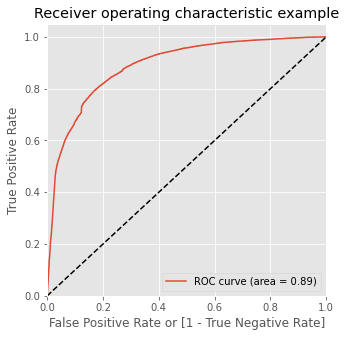

In [79]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.churn_Prob)

**Finding Optimal Cutoff Point**

In [80]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,churn_Prob,ID,churn_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.007027,53909,0,1,0,0,0,0,0,0,0,0,0
1,0,0.090108,3900,0,1,0,0,0,0,0,0,0,0,0
2,1,0.802751,41079,1,1,1,1,1,1,1,1,1,1,0
3,1,0.694296,45406,1,1,1,1,1,1,1,1,0,0,0
4,1,0.670210,43846,1,1,1,1,1,1,1,1,0,0,0


In [81]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.498955  1.000000  0.000000
0.1   0.1  0.685525  0.974344  0.397910
0.2   0.2  0.733079  0.956162  0.510927
0.3   0.3  0.764474  0.936019  0.593644
0.4   0.4  0.786797  0.909409  0.664696
0.5   0.5  0.799862  0.869918  0.730099
0.6   0.6  0.810098  0.818553  0.801679
0.7   0.7  0.792034  0.702041  0.881651
0.8   0.8  0.724431  0.478558  0.969278
0.9   0.9  0.526647  0.054545  0.996780


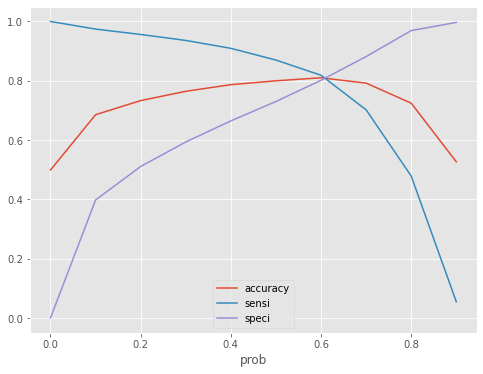

In [82]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(8,6))
plt.show()

**From the plot, the optimal cutoff of 0.62 can be taken here**

In [83]:
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_Prob.map( lambda x: 1 if x > 0.62 else 0)

y_train_pred_final.head()

,churn,churn_Prob,ID,churn_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.007027,53909,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.090108,3900,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.802751,41079,1,1,1,1,1,1,1,1,1,1,0,1
3,1,0.694296,45406,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.670210,43846,1,1,1,1,1,1,1,1,0,0,0,1


In [84]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final.final_predicted )
confusion2

array([[15472,  3472],
       [ 3653, 15212]], dtype=int64)

In [85]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [86]:
print('Sensitivity:', (TP / float(TP+FN)))
print('Specificity:', (TN / float(TN+FP)))
print('Precision:', (TP/float(FP+TP)))

Sensitivity: 0.8063609859528227
Specificity: 0.816722972972973
Precision: 0.8141725540569471


In [87]:
# Let's check the overall accuracy.
print('Accuracy: ',metrics.accuracy_score(y_train_pred_final.churn,y_train_pred_final.final_predicted)) 
print('Recall = ',metrics.recall_score(y_train_pred_final.churn, y_train_pred_final.final_predicted))
print('Precision = ',metrics.precision_score(y_train_pred_final.churn, y_train_pred_final.final_predicted))

Accuracy:  0.8115528048877252
Recall =  0.8063609859528227
Precision =  0.8141725540569471


**Now let's do it for the test-data**

In [88]:
X_test = X_test[col]
X_test.head()

,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,count_rech_2g_6,count_rech_3g_6,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_7,sachet_3g_8
26250,1.391675,3.130465,-0.516855,0.636700,-0.310098,-0.312156,-0.284931,-0.436399,-0.359447,1.512664,-0.374787,-0.330375,-0.252271,-0.20978
39530,-0.462354,-0.587870,-0.516855,0.636700,-0.310098,-0.312156,-0.284931,-0.436399,-0.359447,1.512664,1.539088,1.790724,-0.252271,-0.20978
11129,-0.038804,-0.416111,-0.516855,0.636700,-0.310098,-0.312156,-0.284931,-0.436399,-0.359447,-0.380181,-0.374787,1.790724,2.886300,-0.20978
21906,3.149033,0.239992,0.365978,-0.495465,-0.310098,2.546931,-0.284931,-0.436399,-0.359447,-0.380181,-0.374787,-0.330375,-0.252271,-0.20978
19840,-0.462354,-0.587870,-0.516855,-0.495465,-0.310098,-0.312156,-0.284931,-0.436399,-0.359447,-0.380181,-0.374787,-0.330375,-0.252271,-0.20978


In [89]:
X_test_sm = sm.add_constant(X_test)

In [90]:
# Let's make predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [91]:
# Converting y_pred to a dataframe 
y_pred_1 = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting ConvertID to index
y_test_df['ID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [92]:
y_test_pred_final.head()

,churn,ID,0
0,0,26250,0.001011
1,1,39530,0.694296
2,0,11129,0.548435
3,0,21906,0.020021
4,1,19840,0.802751


In [93]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'churn_Prob'})

In [94]:
y_test_pred_final['final_predicted'] = y_test_pred_final.churn_Prob.map(lambda x: 1 if x > 0.62 else 0)
y_test_pred_final.head()

,churn,ID,churn_Prob,final_predicted
0,0,26250,0.001011,0
1,1,39530,0.694296,1
2,0,11129,0.548435,0
3,0,21906,0.020021,0
4,1,19840,0.802751,1


In [95]:
confusion3 = metrics.confusion_matrix(y_test_pred_final.churn, y_test_pred_final.final_predicted )
confusion3

array([[6583, 1480],
       [1532, 6610]], dtype=int64)

In [96]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [97]:
print('Sensitivity:', (TP / float(TP+FN)))
print('Specificity:', (TN / float(TN+FP)))
print('Precision:', (TP/float(FP+TP)))

Sensitivity: 0.8118398427904692
Specificity: 0.8164454917524495
Precision: 0.8170580964153276


In [98]:
# Let's check the overall accuracy.
print('Accuracy: ',metrics.accuracy_score(y_test_pred_final.churn,y_test_pred_final.final_predicted)) 
print('Recall = ',metrics.recall_score(y_test_pred_final.churn, y_test_pred_final.final_predicted))
print('Precision = ',metrics.precision_score(y_test_pred_final.churn, y_test_pred_final.final_predicted))

Accuracy:  0.8141314409132984
Recall =  0.8118398427904692
Precision =  0.8170580964153276


**2. Models for good predictabilty**

**Before we start with the model building, let's make use of PCA**

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [100]:
pca = PCA(random_state=42)

In [101]:
pca.fit(X_train)

PCA(random_state=42)

In [102]:
pca.explained_variance_ratio_

array([2.55552202e-01, 2.19711228e-01, 9.29162313e-02, 7.41228713e-02,
       6.32159139e-02, 5.26472559e-02, 4.45238267e-02, 3.93027279e-02,
       2.20882001e-02, 1.60997261e-02, 1.51227667e-02, 1.14970222e-02,
       1.14813263e-02, 1.00615665e-02, 8.46476621e-03, 7.77289681e-03,
       5.90950307e-03, 5.14557667e-03, 3.63731566e-03, 3.58222774e-03,
       2.92390819e-03, 2.61036090e-03, 2.46015784e-03, 2.28807208e-03,
       2.12176099e-03, 2.01726969e-03, 1.84305007e-03, 1.69439065e-03,
       1.66534655e-03, 1.62802714e-03, 1.38249964e-03, 1.14621459e-03,
       1.07436148e-03, 1.01817699e-03, 8.34555162e-04, 7.59556589e-04,
       7.28351742e-04, 6.55277306e-04, 6.00190220e-04, 5.57762047e-04,
       5.29522854e-04, 4.40816813e-04, 4.15948351e-04, 4.07312452e-04,
       3.85574145e-04, 3.56260495e-04, 3.39609578e-04, 3.33232636e-04,
       3.01531995e-04, 2.83782374e-04, 2.55270397e-04, 2.22623399e-04,
       2.19968402e-04, 1.98462638e-04, 1.97536136e-04, 1.77574175e-04,
      

In [103]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

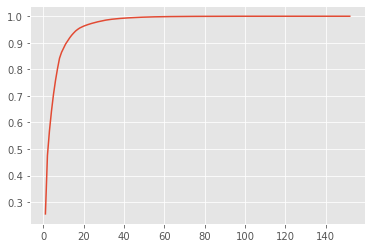

In [104]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

As we can see from the graph, 20 components are able to explain >95% of variance.

In [105]:
# Let's take components = 20
pca2 = PCA(n_components=20, random_state=42)
X_train_pca = pca2.fit_transform(X_train)
X_test_pca = pca2.fit_transform(X_test)

In [106]:
X_train_pca.shape

(37809, 20)

In [107]:
X_test_pca.shape

(16205, 20)

In [108]:
lr_pca = lr.fit(X_train_pca, y_train)
y_pca_pred = lr_pca.predict_proba(X_train_pca)
y_pca_pred[:5]

array([[0.9799866 , 0.0200134 ],
       [0.82450895, 0.17549105],
       [0.16004765, 0.83995235],
       [0.25211115, 0.74788885],
       [0.62695318, 0.37304682]])

In [109]:
# Let's create a dataframe with the churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_Prob':y_pca_pred[:,1]})
y_train_pred_final['ID'] = y_train.index

# Let's create a column 'churn_predicted' with 1 and 0 based on churn_Prob(1: >0.5 and 0: <0.5)
y_train_pred_final['churn_predicted'] = y_train_pred_final.churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

print('Accuracy = ',metrics.accuracy_score(y_train_pred_final.churn, y_train_pred_final.churn_predicted))
print('Recall = ',metrics.recall_score(y_train_pred_final.churn, y_train_pred_final.churn_predicted))
print('Precision = ',metrics.precision_score(y_train_pred_final.churn, y_train_pred_final.churn_predicted))

Accuracy =  0.8038562247084028
Recall =  0.8350914391730718
Precision =  0.7853831197966


In [110]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,churn,churn_Prob,ID,churn_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.020013,53909,0,1,0,0,0,0,0,0,0,0,0
1,0,0.175491,3900,0,1,1,0,0,0,0,0,0,0,0
2,1,0.839952,41079,1,1,1,1,1,1,1,1,1,1,0
3,1,0.747889,45406,1,1,1,1,1,1,1,1,1,0,0
4,1,0.373047,43846,0,1,1,1,1,0,0,0,0,0,0


In [111]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.498955  1.000000  0.000000
0.1   0.1  0.641144  0.976729  0.306957
0.2   0.2  0.701949  0.953671  0.451277
0.3   0.3  0.749504  0.924357  0.575380
0.4   0.4  0.783835  0.887888  0.680215
0.5   0.5  0.803856  0.835091  0.772751
0.6   0.6  0.804517  0.751975  0.856841
0.7   0.7  0.762702  0.609913  0.914854
0.8   0.8  0.690285  0.424066  0.955395
0.9   0.9  0.580920  0.174344  0.985800


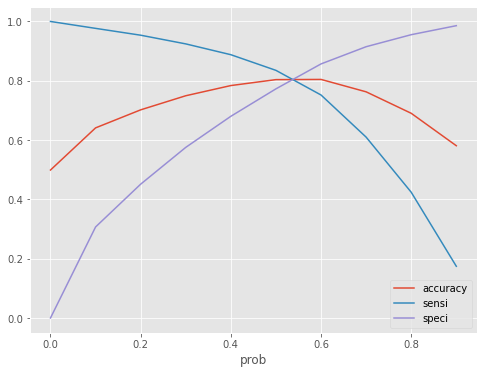

In [112]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(8,6))
plt.show()

In [113]:
y_train_pred_final['final_predicted'] = y_train_pred_final.churn_Prob.map( lambda x: 1 if x > 0.52 else 0)

In [114]:
# Let's check the overall accuracy.
print('Accuracy: ',metrics.accuracy_score(y_train_pred_final.churn,y_train_pred_final.final_predicted)) 
print('Recall = ',metrics.recall_score(y_train_pred_final.churn, y_train_pred_final.final_predicted))
print('Precision = ',metrics.precision_score(y_train_pred_final.churn, y_train_pred_final.final_predicted))

Accuracy:  0.8061837128725965
Recall =  0.8210442618605884
Precision =  0.7967182758088576


#### Predicting on test set

In [115]:
y_pca_pred_test = lr_pca.predict_proba(X_test_pca)

y_test_pred_final = pd.DataFrame({'churn':y_test.values, 'churn_Prob':y_pca_pred_test[:,1]})
y_test_pred_final['ID'] = y_test.index
y_test_pred_final['final_predicted'] = y_test_pred_final.churn_Prob.map(lambda x: 1 if x > 0.52 else 0)
print('Accuracy: ',metrics.accuracy_score(y_test_pred_final.churn,y_test_pred_final.final_predicted)) 
print('Recall: ',metrics.recall_score(y_test_pred_final.churn, y_test_pred_final.final_predicted))
print('Precision: ',metrics.precision_score(y_test_pred_final.churn, y_test_pred_final.final_predicted))

Accuracy:  0.736007405121876
Recall:  0.7087939081306804
Precision:  0.7516280281323261


## Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=3, random_state = 100)
# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# test error
y_pred = shallow_tree.predict(X_test)
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('precision = ',metrics.precision_score(y_test, y_pred))

Accuracy =  0.8642394322739895
Recall =  0.8817243920412675
precision =  0.8530180608365019


## Random Forest

In [117]:
#Apply RandomForest Algorethm
random_classifier= RandomForestClassifier()
random_classifier.fit(X_train,y_train)

RandomForestClassifier()

In [118]:
random_classifier.feature_importances_

array([0.00375336, 0.00465143, 0.01261573, 0.00309307, 0.00334196,
       0.00962027, 0.00386985, 0.00357608, 0.00711649, 0.00225644,
       0.00455646, 0.0382793 , 0.00237571, 0.00512171, 0.05491389,
       0.00275772, 0.00325254, 0.01285162, 0.00326335, 0.00392376,
       0.02512911, 0.00174969, 0.00233644, 0.00359465, 0.00261003,
       0.00331538, 0.00166846, 0.00341379, 0.00423843, 0.03878103,
       0.00382725, 0.00465586, 0.0025655 , 0.00291256, 0.00358172,
       0.00406844, 0.00091868, 0.00114576, 0.00074951, 0.00324066,
       0.00449124, 0.00807322, 0.00134242, 0.00130422, 0.00134836,
       0.00521334, 0.0096872 , 0.00376356, 0.00300939, 0.        ,
       0.        , 0.00323256, 0.0037536 , 0.01785832, 0.00394272,
       0.00396543, 0.03689851, 0.00508926, 0.00554124, 0.05706361,
       0.00238213, 0.00232608, 0.01341469, 0.00394178, 0.00844319,
       0.0751113 , 0.00307884, 0.00284408, 0.0021282 , 0.00262346,
       0.00343661, 0.0066942 , 0.00120188, 0.00124703, 0.00195

Text(0.5, 0, 'Random Forest Feature Importance')

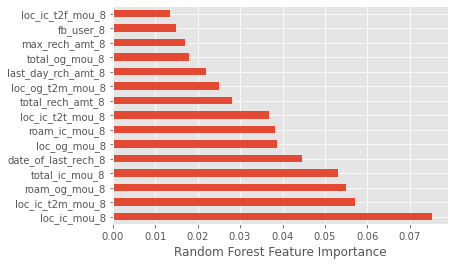

In [121]:
#sorted_idx = random_classifier.feature_importances_.argsort()
#plt.barh(X_train.columns[sorted_idx], random_classifier.feature_importances_[sorted_idx])
pd.Series(random_classifier.feature_importances_, index=X.columns).nlargest(15).plot(kind='barh') 
plt.xlabel("Random Forest Feature Importance")

In [118]:
y_pred= random_classifier.predict(X_test)

In [119]:
#Classification Report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8063
           1       0.95      0.97      0.96      8142

    accuracy                           0.96     16205
   macro avg       0.96      0.96      0.96     16205
weighted avg       0.96      0.96      0.96     16205



In [120]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('precision = ',metrics.precision_score(y_test, y_pred))

Accuracy =  0.9609996914532551
Recall =  0.9722426922132155
precision =  0.951213650564768


## AdaBoost

In [122]:
from sklearn.ensemble import AdaBoostClassifier
# adaboost = AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 1)
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)

AdaBoostClassifier()

In [123]:
y_pred = adaboost.predict(X_test)

In [125]:
#Classification Report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93      8063
           1       0.92      0.93      0.93      8142

    accuracy                           0.93     16205
   macro avg       0.93      0.93      0.93     16205
weighted avg       0.93      0.93      0.93     16205



In [124]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('precision = ',metrics.precision_score(y_test, y_pred))

Accuracy =  0.9265041653810552
Recall =  0.9317121100466715
precision =  0.9227587884685562


## XGBoost

In [126]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

[23:22:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
y_pred = xgb.predict(X_test)

In [128]:
#Classification Report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8063
           1       0.96      0.97      0.96      8142

    accuracy                           0.96     16205
   macro avg       0.96      0.96      0.96     16205
weighted avg       0.96      0.96      0.96     16205



In [129]:
print('Accuracy = ',metrics.accuracy_score(y_test, y_pred))
print('Recall = ',metrics.recall_score(y_test, y_pred))
print('precision = ',metrics.precision_score(y_test, y_pred))

Accuracy =  0.9643937056464055
Recall =  0.9688037337263572
precision =  0.9606625258799172


It can be seen that the sensitivity is high for both the random forest model. Although it is less accurate than the previous regression model.

**Model Insights**

1. Among all the models, Random Forest and XGBoost were the best models.
2. Both the models maintained a balance between the accuracy and recall.

**Business Insights**

1. Based on the interpretable model 'Logistic Regression' the following predictors were found to be the most important:

    a) loc_ic_t2t_mou_8
    
    b) monthly_2g_8 
    
    c) monthly_3g_8
    
    d) loc_ic_t2m_mou_8 
    
    e) sachet_2g_8
    
    f) count_rech_2g_6
    
2. This suggests that most people have 2g mobile networks and these predictors have a negative relation to churn. Most variables    showed a negative growth in the later months. For eg., total recharge no. went down in the later months. Hence, the data from the later months can be used for a good churn prediction.